# "Hello World!" of the Quantum Algorithms, Deutsch's Algorithm

The Deutsch algorithm, proposed by David Deutsch in 1985, is a quantum algorithm that efficiently solves a particular problem that illustrates the potential power of quantum computation. It is the simplest example of a quantum algorithm that performs better than the best possible deterministic classical algorithm. 

Given a black box quantum computer known as an oracle, which implements some function $f:\{0,1\}\rightarrow \{0,1\}$. The function $f$ takes a single bit as input and produces a single bit as output. There are four possible functions $f$ that you might be dealing with:

$\begin{aligned}
\begin{array}{ccc}
                                                 & x=0     & x=1     \\
\text{The function is constantly 0}                     & f_c(0)=0 & f_c(1)=0 \\
\text{The function is constantly 1}                     & f_c(0)=1 & f_c(1)=1 \\
\text{The function is the identity function (balanced)} & f_b(0)=0 & f_b(1)=1 \\
\text{The function is the negation function (balanced)} & f_b(0)=1 & f_b(1)=0
\end{array}
\end{aligned}$

Task is to determine if the given function $f$ is constant (the same output for all inputs) or balanced (outputs 0 for one input and 1 for the other) using the least number of function evaluations. Classically, you would need to evaluate the function twice to determine this. However, the Deutsch algorithm can determine this with a single evaluation using quantum parallelism. $\newline$
The Deutsch algorithm takes the following steps using a 2-qubit system:

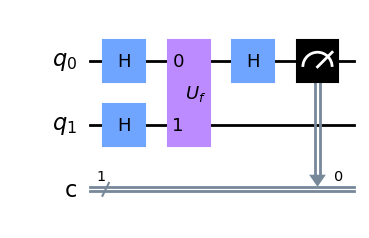

In [8]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi


# Step 1: Initialize a quantum circuit with 2 qubits and 1 classical bit for the measurement
qc = QuantumCircuit(2, 1)

#Defining cnot operator, but it won't be necessary to know the operator
cx_op = qi.Operator([[1, 0, 0, 0],
                     [0, 0, 0, 1],
                     [0, 0, 1, 0],
                     [0, 1, 0, 0]])

# Step 2: Apply Hadamard gates to both qubits
qc.h(0)
qc.h(1)

# Step 3: Apply the oracle
qc.unitary(cx_op, [0,1],label="$U_f$")

# Step 4: Apply Hadamard gate to the first qubit
qc.h(0)

# Step 5: Measure the first qubit and store the result in the first classical bit
qc.measure(0, 0)

# Display the circuit
qc.draw('mpl')

### Steps of the Algorithm:

1. Prepare two qubits in the state $\ket{0}\ket{1}$.
2. Apply a Hadamard gate to both qubits to create a superposition:

   $ H\ket{0} \rightarrow \frac{\ket{0} + \ket{1}}{\sqrt{2}}, \quad H\ket{1} \rightarrow \frac{\ket{0} - \ket{1}}{\sqrt{2}}. $

3. Apply the oracle function $U_f$ that performs the transformation $U_f \ket{x}\ket{y} = \ket{x}\ket{y \oplus f(x)}$.
4. Apply a Hadamard gate to the first qubit again, which will create interference patterns based on the function $f$.
5. Measure the first qubit. If $f$ is constant, the measurement result will be $\ket{0}$. If $f$ is balanced, the result will be $\ket{1}$.


## Entangled Qubits (Bell States)

Bell States are specific quantum states that involve two qubits (quantum bits) that are maximally entangled with each other. When qubits are entangled, the state of one qubit is directly related to the state of the other, no matter the distance between them. There are four Bell States, and they are denoted as follows:

1. $\ket{\Phi^+}$: This state is represented as $ \frac{1}{\sqrt{2}}( \ket{00} + \ket{11} ) $. If you measure one qubit and find it in state 0, the other qubit will also be found in state 0; similarly, if one is in state 1, so is the other.
2. $\ket{\Phi^-}$: This state is represented as $ \frac{1}{\sqrt{2}}( \ket{00} - \ket{11} ) $, this state also shows strong correlations between the two qubits, but with a relative phase difference
3. $\ket{\Psi^+}$: This state $ \frac{1}{\sqrt{2}}( \ket{01} + \ket{10} ) $, means that if one qubit is measured in state 0, the other will be in state 1, and vice versa.
4. $\ket{\Psi^-}$: Similar to $\ket{\Psi^+} $ but with a relative phase difference, it is represented as $ \frac{1}{\sqrt{2}}( \ket{01} - \ket{10} ) $

These states are essential in various quantum information processing tasks, such as quantum teleportation and superdense coding. Understanding Bell States is fundamental to grasping more complex concepts and protocols in quantum computing, as they exemplify the peculiar and non-local properties of quantum entanglement.